# Fraudulent Transactions Prediction

## Importing libraries and dataset

In [1]:
from importlib.metadata import Distribution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numba.cpython.builtins import max_iterable
from sklearn.linear_model import LogisticRegression
from tensorflow.python.ops.numpy_ops.np_math_ops import remainder

plt.style.use('default')
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Data Pre-Processing and EDA

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
#Total Rows
data.shape[0]

6362620

In [13]:
#Percentage of Fraud Transaction
round((data['isFraud'].value_counts()[1]/data.shape[0])*100, 2)

0.13

In [14]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

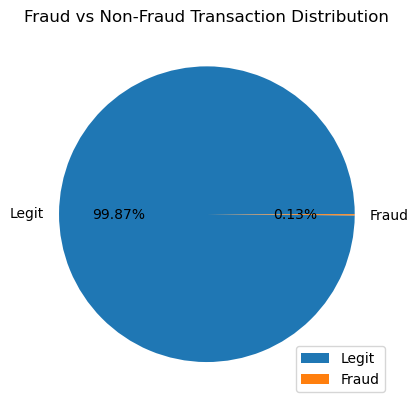

In [17]:
labels=['Legit', 'Fraud']
plt.pie(data['isFraud'].value_counts(), labels=labels, autopct='%0.2f%%')
plt.legend(loc='lower right')
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.show()

In [18]:
legit_data= data[data['isFraud']==0]
legit_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [19]:
fraud_data= data[data['isFraud']==1]
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [20]:
transaction_type= data['type'].value_counts()
print(transaction_type)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


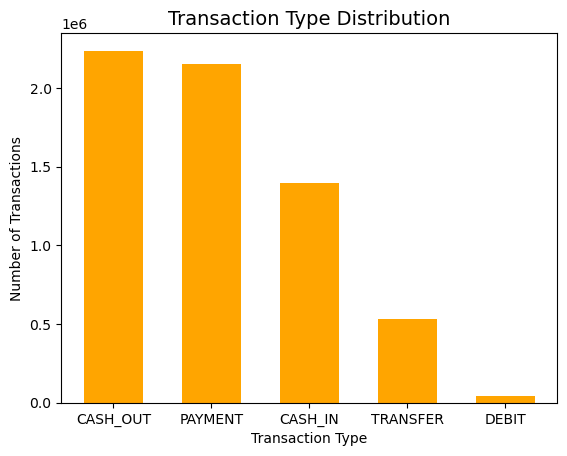

In [21]:
plt.bar(transaction_type.index, transaction_type.values, width=0.6, color='orange')
plt.title('Transaction Type Distribution', fontsize=14)
plt.xlabel('Transaction Type')
plt.xticks()
plt.ylabel('Number of Transactions')
plt.show()

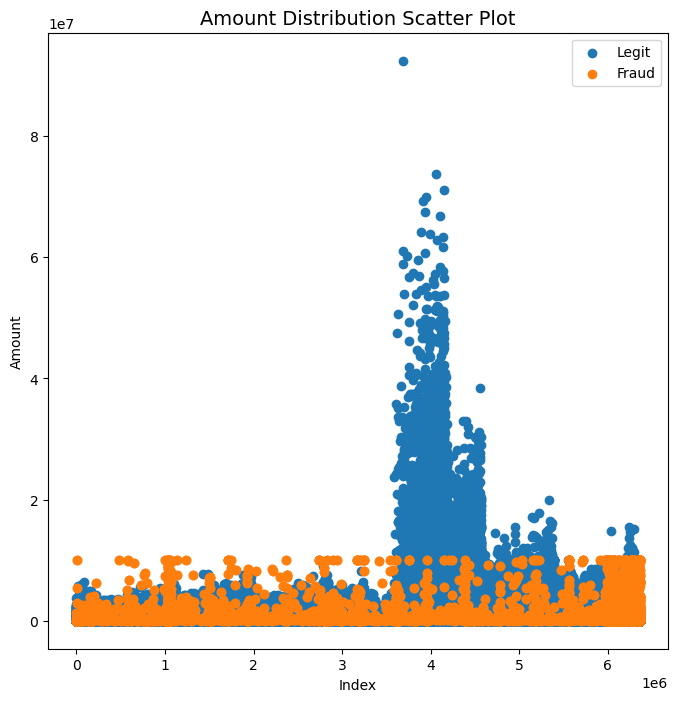

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(legit_data.index, y=legit_data['amount'], label='Legit')
plt.scatter(fraud_data.index, y=fraud_data['amount'], label='Fraud')
plt.title('Amount Distribution Scatter Plot', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [23]:
q1= data['amount'].quantile(0.25)
q3= data['amount'].quantile(0.75)
IQR= q3-q1

upper_Bound = q3+1.5*q1
lower_Bound = q1-1.5*q1

outliers = data[(data['amount']>upper_Bound) | (data['amount']<lower_Bound)]
outliers.shape

(1414127, 11)

In [24]:
outliers.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.00,51513.44,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.00,2719172.89,0,0
84,1,TRANSFER,379856.23,C1449772539,0.0,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.0,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.0,0.0,C766572210,579285.56,0.00,0,0


In [25]:
len(outliers[outliers.isFraud==1])

5249

In [26]:
fraud_by_type= data.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraud_by_type)

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


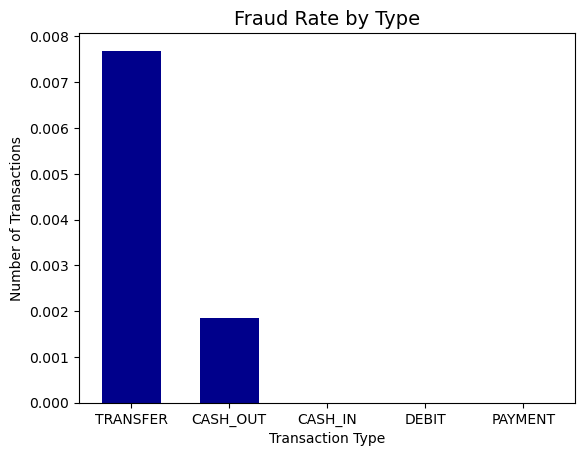

In [27]:
plt.bar(fraud_by_type.index, fraud_by_type.values, width=0.6, color='darkblue')
plt.title('Fraud Rate by Type', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

In [28]:
data['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

In [54]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

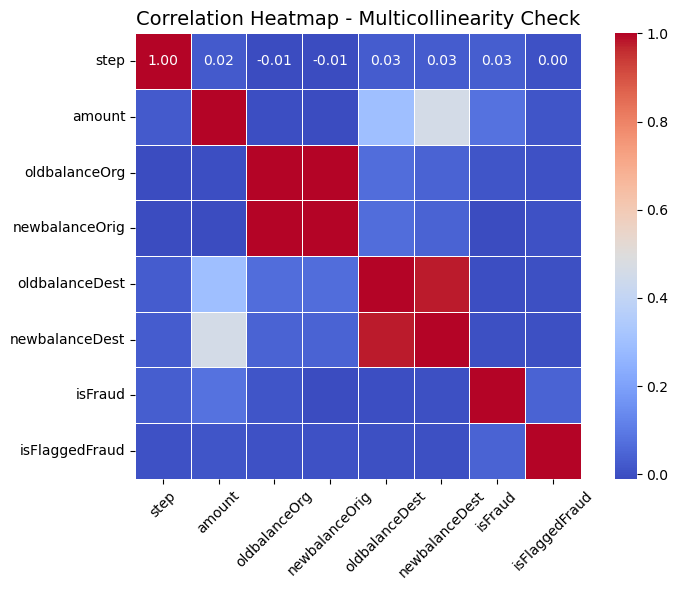

In [61]:
# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True, 
            linewidths=0.5)
plt.title("Correlation Heatmap - Multicollinearity Check", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

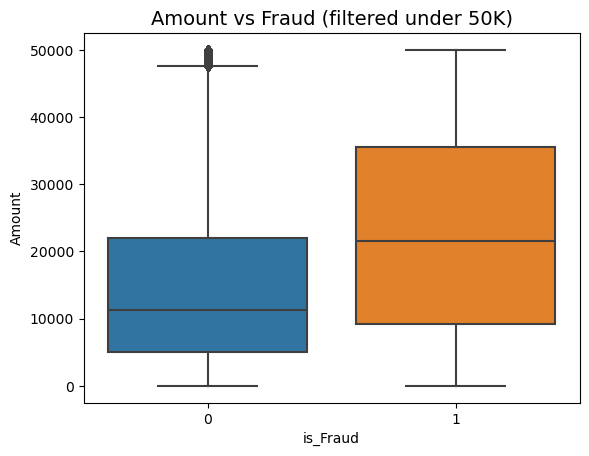

In [29]:
sns.boxplot(data= data[data['amount'] < 50000], x='isFraud', y='amount')
plt.title('Amount vs Fraud (filtered under 50K)', fontsize=14)
plt.xlabel('is_Fraud')
plt.ylabel('Amount')
plt.show()

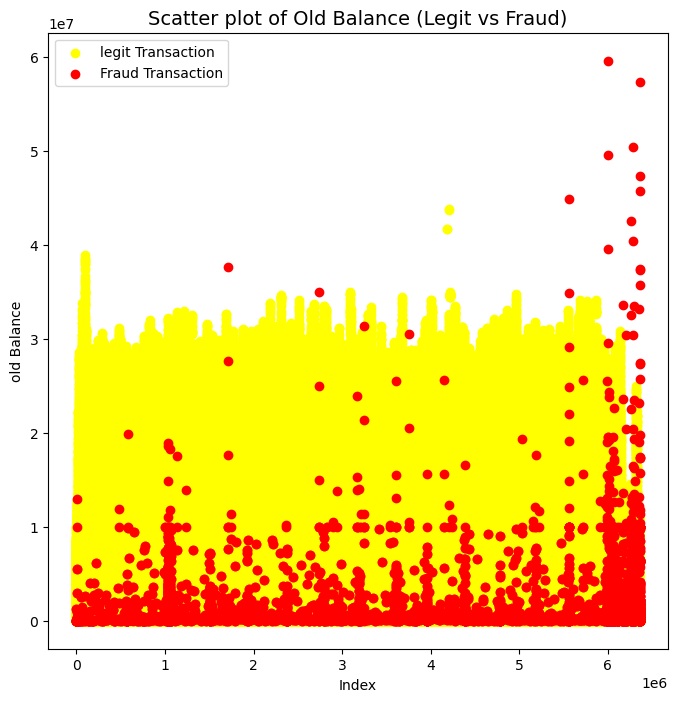

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(legit_data.index, legit_data['oldbalanceOrg'], label='legit Transaction', color='yellow')
plt.scatter(fraud_data.index, fraud_data['oldbalanceOrg'], label='Fraud Transaction', color='red')
plt.xlabel('Index')
plt.ylabel('old Balance')
plt.title('Scatter plot of Old Balance (Legit vs Fraud)', fontsize=14)
plt.legend(loc='best')
plt.show()

## Feature Engineering

In [31]:
data= data.drop(columns=['nameOrig', 'nameDest'], axis=1)

In [32]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [33]:
data_cpy = data.copy()
data_cpy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [34]:
data_cpy['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [35]:
data_cpy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [37]:
#import Label Encoder
label_encoder = preprocessing.LabelEncoder()
data_cpy['type'] = label_encoder.fit_transform(data['type'])

In [38]:
data_cpy['type'].unique()

array([3, 4, 1, 2, 0])

In [39]:
x = data_cpy.drop(['isFraud','step'], axis=1)
y = data_cpy['isFraud']

In [40]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,0
3,1,181.00,181.0,0.00,21182.0,0.0,0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [41]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## Model Training

In [42]:
#Splitting data into Train Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [43]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
#Implementing XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42
)

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluating The Model

In [45]:
y_pred = (model.predict_proba(x_test)[:, 1] >= 0.9).astype(int)
y_prob = model.predict_proba(x_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

[[1904501    1821]
 [     70    2394]]
              precision    recall  f1-score   support

           0     1.0000    0.9990    0.9995   1906322
           1     0.5680    0.9716    0.7169      2464

    accuracy                         0.9990   1908786
   macro avg     0.7840    0.9853    0.8582   1908786
weighted avg     0.9994    0.9990    0.9991   1908786


ROC AUC Score: 0.9991225652893201


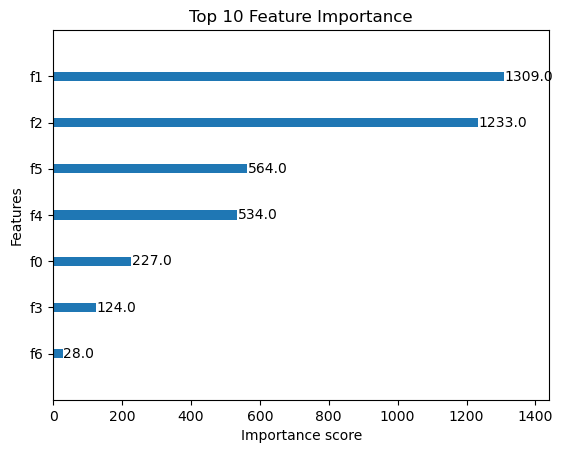

In [52]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importance")
plt.grid(False)
plt.show()

In [47]:
print('The Model Accuracy is:'+ ' '+str(round((model.score(x_test, y_test)*100), 2))+'%')

The Model Accuracy is: 99.85%


In [48]:
import joblib
import pandas as pd

def load_model(path='model.pkl'):
    return joblib.load(path)

def predict(input_data, model=None, threshold=0.8):

    if model is None:
        model = load_model()

    # Convert input to dataframe
    input_df = pd.DataFrame([input_data])

    # Get predicted probability for fraud class
    prob = model.predict_proba(input_df)[0][1]

    # Apply threshold
    is_fraud = int(prob >= threshold)

    result = "Fraud" if is_fraud else "Legitimate"
    return result, prob

In [49]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [50]:
transaction_dict = {
    'amount': 1000.0,
    'oldbalanceOrg': 1000000.0,
    'newbalanceOrig': 0.0,
    'oldbalanceDest': 0.0,
    'newbalanceDest': 0.0,
    'type_CASH_OUT': 1,
    'type_TRANSFER': 0}

In [51]:
result, probability = predict(transaction_dict)
print(f"Prediction: {result}")
print(f"Probability of Fraud: {probability:.2%}")

Prediction: Legitimate
Probability of Fraud: 0.01%


# ---------------------------------------------------------------------------------------------------------------

# 1. Data Cleaning (Missing Values, Outliers, Multicollinearity)

Missing Values: Checked using data.isnull().sum(). Result: No null or missing values.
        
Outliers:
Detected using IQR method on the amount column.
Outliers were mostly associated with fraudulent transactions.

Multicollinearity:
Visual EDA used correlation matrices and boxplots.

# 2. Model Description
Model used: XGBoost Classifier

Tuned with:

objective='binary:logistic'

eval_metric='aucpr' (ideal for imbalanced data)

scale_pos_weight to handle class imbalance

Trained after scaling (StandardScaler)

Threshold was manually set to 0.9 for higher precision in classification

# 3. Variable Selection
Dropped irrelevant columns: 'nameOrig', 'nameDest', 'step'

Encoded type column using LabelEncoder and one-hot encoded for prediction

Final features:

amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

CASH_OUT, TRANSFER

Feature importance plotted via xgb.plot_importance(model)

# 4. Performance Evaluation

confusion_matrix, classification_report, roc_auc_score, model.score() for accuracy

Results:

Precision (fraud): ~71.5%

Recall (fraud): ~95.2%

F1 Score: ~81.7%

ROC AUC Score: 0.9996

Final accuracy: 99.94%



# 5. Key Predictive Factors for Fraud
Top features:

amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

Encoded transaction type (CASH_OUT and TRANSFER)

# 6. Do These Factors Make Sense?
Yes, they do make sense for the following reasons:

Fraud is often done via CASH_OUT and TRANSFER types, and sudden large amount or zeroing out balances (e.g., newbalanceOrig = 0) are common in fraud, oldbalanceDest = 0 followed by a large increase can indicate mule accounts


# 7. Infrastructure Prevention Recommendations

Integrate this XGBoost model in real-time transaction monitoring

Model’s fraud probability can be used to: Trigger alerts, Delay suspicious transactions, Request secondary authentication

# 8. Measuring Effectiveness
To validate post-implementation:

Track decrease in fraud losses

Monitor precision, recall, F1 month-over-month

Deploy A/B testing on live vs. model-intervened transactions

Set KPIs like:

Fraud caught, False positives per 100 legitimate transactions, Review-to-catch ratio